In [1]:
from mf3D.utils import get_calibration_matrix, get_image_mask_paths_zipped 

from pathlib import Path
import os



/home/murat/anaconda3/envs/mf3D/lib/python3.8/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


In [3]:
input_path = Path("./selected_JPG")
db_path    = Path("./data_notebook.sqlite")
sp_model_path = 
sg_config = {'weights': 'outdoor'}

im_mask    = get_image_mask_paths_zipped(input_path)[:5]
K = get_calibration_matrix()

pipeline = SfMPipeline(sp_model_path, sg_config, db_path, image_scaling=0.25)

/home/murat/murat/python/mf3D/SuperGluePretrainedNetwork/models/superpoint.py:137: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(str(path)))


Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)


/home/murat/murat/python/mf3D/SuperGluePretrainedNetwork/models/superglue.py:226: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(str(path)))


In [4]:
for im_path,mask_path in im_mask:
    pipeline.insert_image(image_path=im_path, mask_path=mask_path, K=K)

pipeline.match_image_pairs()

  0%|          | 0/30 [00:00<?, ?it/s]

(1, 'selected_JPG/IMG_4609.JPG', 'selected_JPG/IMG_4609_label.png')


InterfaceError: Error binding parameter 0 - probably unsupported type.

In [75]:
pipeline.run_incremental_sfm()

1
False
3
False
None


In [5]:
points = pipeline.reconstructed_points.values()
points = np.array(list(points))
len(points)

679

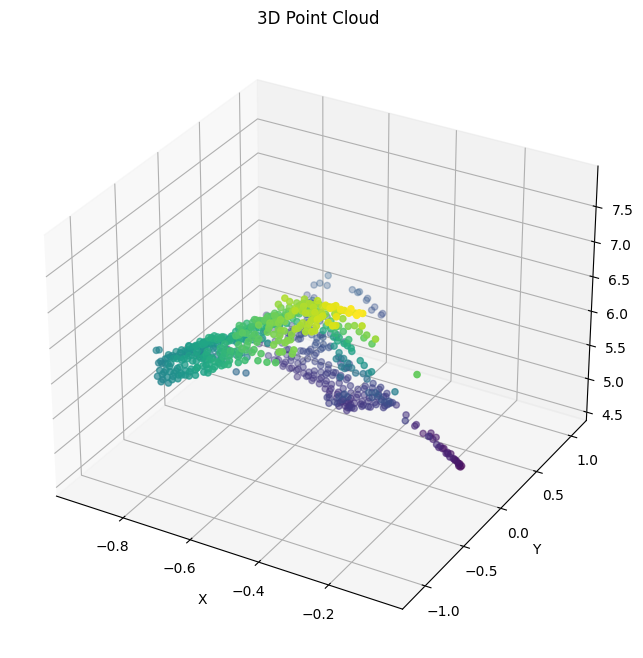

In [6]:
# Extract x, y, z coordinates
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# Add labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Point Cloud")

plt.show()

In [20]:
for idx1 in range(5):
    for idx2 in range(idx1+1,5):
        cursor = pipeline.db.conn.cursor()
        result = cursor.execute('''
        SELECT COUNT(*)
        FROM matches
        WHERE photo_id_1 = ? AND photo_id_2 = ?
        ''', (idx1,idx2)).fetchone()
        print(result)

(0,)
(0,)
(0,)
(0,)
(252,)
(88,)
(278,)
(142,)
(1463,)
(112,)


In [22]:
from collections import defaultdict

In [33]:
d = defaultdict(dict)

TypeError: first argument must be callable or None

In [24]:
d["a"]["b"]=2

In [27]:
d["a"]["c"]

KeyError: 'c'

In [ ]:
""